In [1]:
#import some 
from wanniertb import *
import matplotlib.pyplot as plt

----- k_path report begin ----------
real-space lattice vectors
 [[-2.6988  0.      2.6988]
 [ 0.      2.6988  2.6988]
 [-2.6988  2.6988  0.    ]]
k-space metric tensor
 [[ 0.10297 -0.03432 -0.03432]
 [-0.03432  0.10297 -0.03432]
 [-0.03432 -0.03432  0.10297]]
internal coordinates of nodes
 [[ 0.5    0.5    0.5  ]
 [ 0.     0.     0.   ]
 [ 0.5   -0.5    0.   ]
 [ 0.375 -0.375  0.   ]
 [ 0.     0.     0.   ]]
reciprocal-space lattice vectors
 [[-0.18527 -0.18527  0.18527]
 [ 0.18527  0.18527  0.18527]
 [-0.18527  0.18527 -0.18527]]
cartesian coordinates of nodes
 [[-9.26338e-02  9.26338e-02  9.26338e-02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [-1.85268e-01 -1.85268e-01 -1.38778e-17]
 [-1.38951e-01 -1.38951e-01 -1.38778e-17]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]]
list of segments:
  length = 0.16045  from  [0.5 0.5 0.5]  to  [0. 0. 0.]
  length = 0.26201  from  [0. 0. 0.]  to  [ 0.5 -0.5  0. ]
  length =  0.0655  from  [ 0.5 -0.5  0. ]  to  [ 0.375 -0.375  0.   ]
  length = 0.19

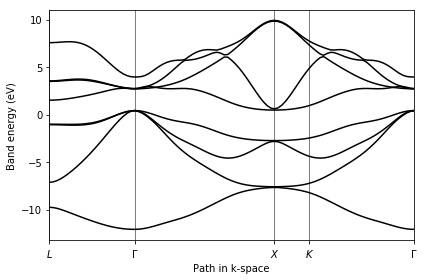

In [2]:
silicon=w90(r"silicon")

# hard coded fermi level in eV
fermi_ev=0.62285135E+01

# get tight-binding model without hopping terms above 0.01 eV
my_model=silicon.model(zero_energy=fermi_ev,min_hopping_norm=0.01,max_distance=None,ignorable_imaginary_part=0.01)

# solve model on a path and plot it
path=[[0.5,0.5,0.5],[0.0,0.0, 0.0],[0.5,-0.5,0.0], [0.375,-0.375,0.0], [0.0, 0.0, 0.0]]
# labels of the nodes
k_label=(r'$L$', r'$\Gamma$',r'$X$', r'$K$', r'$\Gamma$')
# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,101)
#
evals=my_model.solve_all(k_vec)
fig, ax = plt.subplots()
for i in range(evals.shape[0]):
    ax.plot(k_dist,evals[i],"k-")
for n in range(len(k_node)):
    ax.axvline(x=k_node[n],linewidth=0.5, color='k')
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy (eV)")
ax.set_xlim(k_dist[0],k_dist[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
fig.tight_layout()
#fig.savefig("silicon_quick.pdf")
plt.show();